In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.metrics import classification_report
from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import itertools


In [2]:
#prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
prosody_data = pd.read_csv('prosodic_features_M2.csv',sep=",")

#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
#For MRH X = prosody_data.iloc[:, 6:].values
#For M2
X = prosody_data.iloc[:, 16:].values

#X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.494016,-0.171536,-0.496751,-0.622835,0.385222,-0.284100,0.114470,-0.057878,-0.237511,-0.345507,...,0.057925,-0.106409,-0.002503,-0.002243,0.009819,-0.002166,0.285430,-0.070495,0.019893,-0.088921
1,0.078701,1.385857,0.657562,0.320563,-0.088185,-0.600497,0.451778,-0.272996,-0.040744,0.377869,...,-0.164907,0.048223,0.249218,0.006687,0.101469,-0.063824,0.008189,-0.011727,0.031428,-0.052829
2,0.432815,0.272796,-0.099460,-0.275173,-0.026557,-0.111483,0.478132,-0.173289,0.002044,0.048401,...,-0.089443,-0.006481,-0.032480,0.045904,-0.012745,-0.097389,0.046029,0.038667,-0.008717,0.144120
3,0.200215,-0.772981,-0.432973,1.055900,0.599051,0.031723,0.206089,-0.304060,-0.179504,0.101164,...,-0.022237,0.125421,-0.319202,0.115098,0.020012,0.130631,0.109509,-0.048473,0.042461,-0.023628
4,0.513886,0.456471,-0.326179,0.672822,0.096611,0.857256,0.229532,-0.298676,0.087362,-0.160154,...,-0.104253,0.045740,-0.188518,-0.013871,0.199889,-0.015066,0.170483,0.201029,-0.048755,0.124816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.618490,-1.151266,0.037552,0.267350,-0.141187,-0.110928,0.194880,-0.120720,-0.155586,0.138747,...,-0.163054,-0.172897,0.050841,-0.061979,0.084856,-0.099079,0.069516,-0.117494,-0.024722,0.098076
132,-0.882332,-0.681777,0.162434,-0.058137,-0.069321,0.257722,-0.140914,0.143708,0.107353,0.089534,...,-0.103081,-0.081477,0.193910,-0.060815,-0.039843,0.155334,0.010692,-0.055444,-0.035602,0.007519
133,-0.992976,0.372202,-0.826337,-0.072030,-0.188232,0.302790,-0.131028,-0.206906,-0.521842,0.375649,...,0.172065,-0.115331,0.277781,-0.096358,0.058655,-0.047499,-0.004099,-0.155851,-0.029244,0.072537
134,0.208820,0.590769,0.053104,-0.225922,0.564491,-0.038376,0.087932,0.337195,0.178077,0.204762,...,-0.081026,0.015956,0.051312,0.022164,-0.186776,0.034933,0.004417,0.046805,-0.063001,0.186115


In [4]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Hired3C
0,-0.494016,-0.171536,-0.496751,-0.622835,0.385222,-0.284100,0.114470,-0.057878,-0.237511,-0.345507,...,-0.106409,-0.002503,-0.002243,0.009819,-0.002166,0.285430,-0.070495,0.019893,-0.088921,1
1,0.078701,1.385857,0.657562,0.320563,-0.088185,-0.600497,0.451778,-0.272996,-0.040744,0.377869,...,0.048223,0.249218,0.006687,0.101469,-0.063824,0.008189,-0.011727,0.031428,-0.052829,0
2,0.432815,0.272796,-0.099460,-0.275173,-0.026557,-0.111483,0.478132,-0.173289,0.002044,0.048401,...,-0.006481,-0.032480,0.045904,-0.012745,-0.097389,0.046029,0.038667,-0.008717,0.144120,0
3,0.200215,-0.772981,-0.432973,1.055900,0.599051,0.031723,0.206089,-0.304060,-0.179504,0.101164,...,0.125421,-0.319202,0.115098,0.020012,0.130631,0.109509,-0.048473,0.042461,-0.023628,2
4,0.513886,0.456471,-0.326179,0.672822,0.096611,0.857256,0.229532,-0.298676,0.087362,-0.160154,...,0.045740,-0.188518,-0.013871,0.199889,-0.015066,0.170483,0.201029,-0.048755,0.124816,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.618490,-1.151266,0.037552,0.267350,-0.141187,-0.110928,0.194880,-0.120720,-0.155586,0.138747,...,-0.172897,0.050841,-0.061979,0.084856,-0.099079,0.069516,-0.117494,-0.024722,0.098076,2
132,-0.882332,-0.681777,0.162434,-0.058137,-0.069321,0.257722,-0.140914,0.143708,0.107353,0.089534,...,-0.081477,0.193910,-0.060815,-0.039843,0.155334,0.010692,-0.055444,-0.035602,0.007519,2
133,-0.992976,0.372202,-0.826337,-0.072030,-0.188232,0.302790,-0.131028,-0.206906,-0.521842,0.375649,...,-0.115331,0.277781,-0.096358,0.058655,-0.047499,-0.004099,-0.155851,-0.029244,0.072537,2
134,0.208820,0.590769,0.053104,-0.225922,0.564491,-0.038376,0.087932,0.337195,0.178077,0.204762,...,0.015956,0.051312,0.022164,-0.186776,0.034933,0.004417,0.046805,-0.063001,0.186115,0


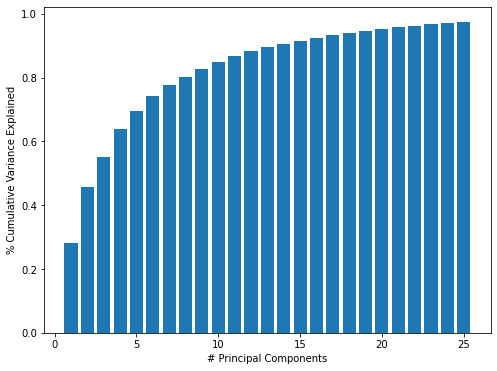

In [5]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,26), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [6]:
pca.explained_variance_ratio_

array([0.28259441, 0.17484543, 0.09359988, 0.08761823, 0.05666359,
       0.0453989 , 0.03567581, 0.02634682, 0.02552338, 0.02038901,
       0.01865771, 0.01483255, 0.01231131, 0.01158525, 0.00988685,
       0.00903914, 0.0085191 , 0.00739683, 0.00611355, 0.00570139,
       0.00508428, 0.00488889, 0.00415489, 0.00335477, 0.00329292])

Text(0, 0.5, 'pc2')

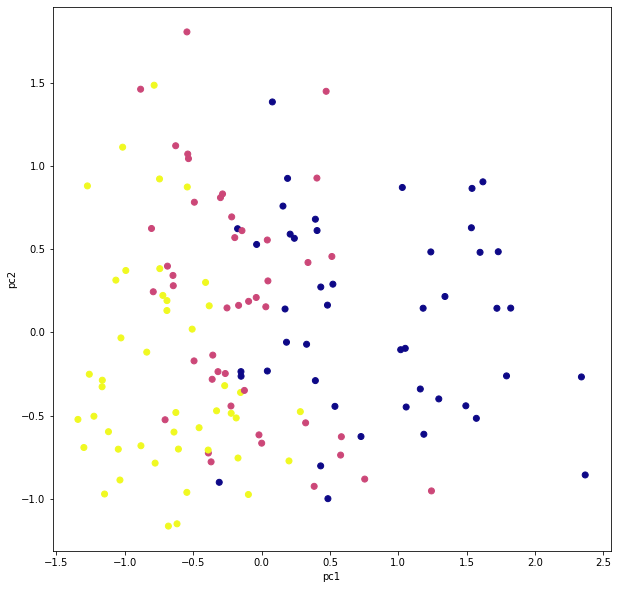

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=finalDf['Hired3C'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

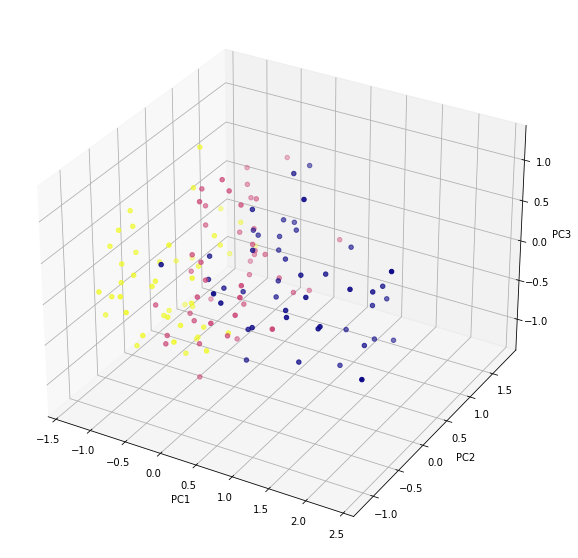

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=finalDf['Hired3C'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [9]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / 25
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print("\n\nEigenvector:",np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print("Eigenvalue:",eigenvalue)



Eigenvector: 3.772278625708718
Eigenvalue: 0.6985701158719845


Eigenvector: 2.333965717232398
Eigenvalue: 0.4322158735615546


Eigenvector: 1.2494402025347582
Eigenvalue: 0.23137781528421478


Eigenvector: 1.1695927047472061
Eigenvalue: 0.21659124161985288


Eigenvector: 0.7563873737457604
Eigenvalue: 0.14007173587884472


Eigenvector: 0.6060180049074035
Eigenvalue: 0.11222555646433367


Eigenvector: 0.4762269751251715
Eigenvalue: 0.0881901805787353


Eigenvector: 0.3516967460953011
Eigenvalue: 0.06512902705468537


Eigenvector: 0.3407049049711807
Eigenvalue: 0.063093500920589


Eigenvector: 0.27216754592251347
Eigenvalue: 0.05040139739305801


Eigenvector: 0.24905689293836125
Eigenvalue: 0.04612164684043721


Eigenvector: 0.1979958733987145
Eigenvalue: 0.03666590248124341


Eigenvector: 0.1643404253371562
Eigenvalue: 0.03043341209947329


Eigenvector: 0.15464848242916285
Eigenvalue: 0.028638607857252363


Eigenvector: 0.1319769336104602
Eigenvalue: 0.02444017289082594


Eigenvector

In [10]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    clf = SVC(probability=True)
    clf.fit(X, y)
    clf.score(X, y)
    #AdaBoostClassifier(n_estimators=100, random_state=0)
    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    #X_10_train =X_train[:,26] != 2
    X_10_test = X_test.loc[y_test!= 2]
    #X_10_test = X_test[:,26] != 2
    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    clf =  SVC(probability=True)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)

    print('MSE',metrics.mean_squared_error(y_test,combined_Predictions))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return acc 


              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00        10
     class 1       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         5
     class 0       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         5
     class 1       1.00      1.00      1.00         5
     class 2       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1

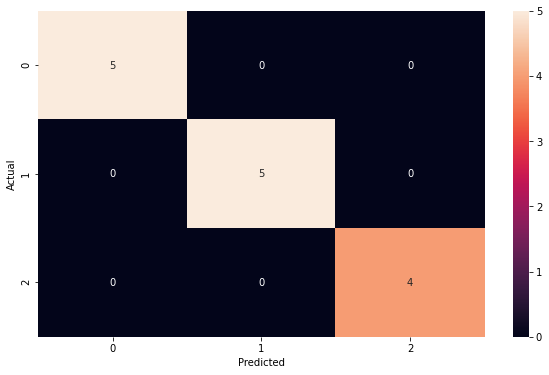

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         9
     class 1       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

              precision    recall  f1-score   support

     class 1       1.00      0.75      0.86         4
     class 0       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

              precision    recall  f1-score   support

     class 0       1.00      0.75      0.86         4
     class 1       0.83      1.00      0.91         5
     class 2       1.00      1.00      1.00         5

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.92        14
weighted avg       0

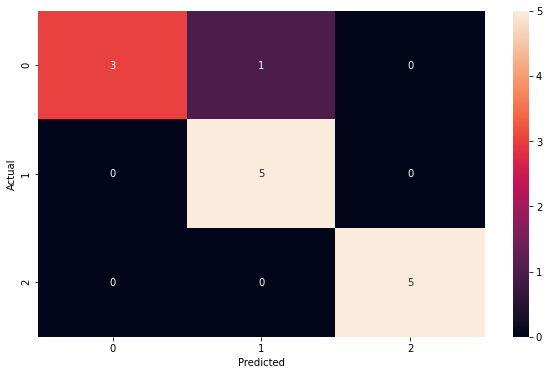

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         9
     class 1       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         4
     class 0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         4
     class 1       1.00      1.00      1.00         5
     class 2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1

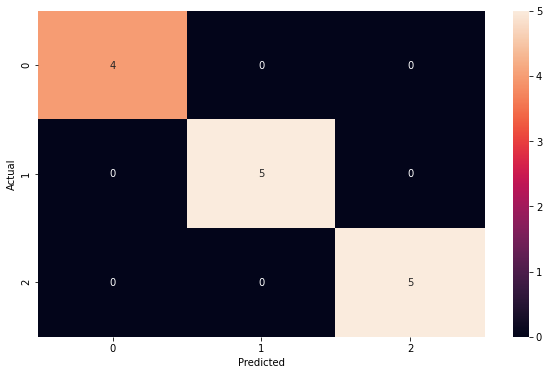

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         9
     class 1       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         4
     class 0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         4
     class 1       1.00      1.00      1.00         5
     class 2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1

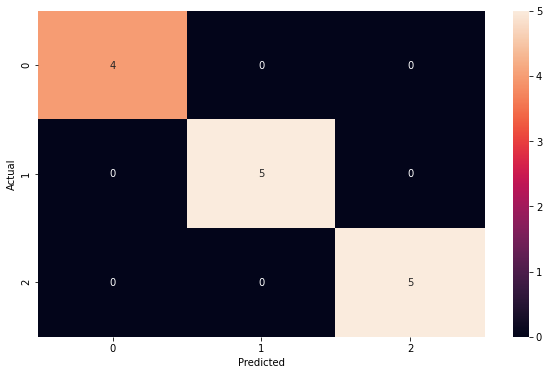

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         9
     class 1       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         4
     class 0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         4
     class 1       1.00      1.00      1.00         5
     class 2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1

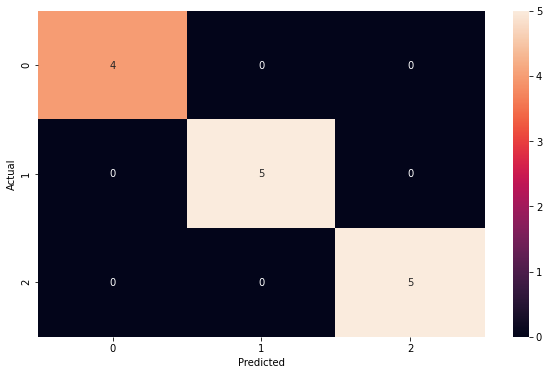

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         9
     class 1       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         5
     class 0       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         5
     class 1       1.00      1.00      1.00         4
     class 2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1

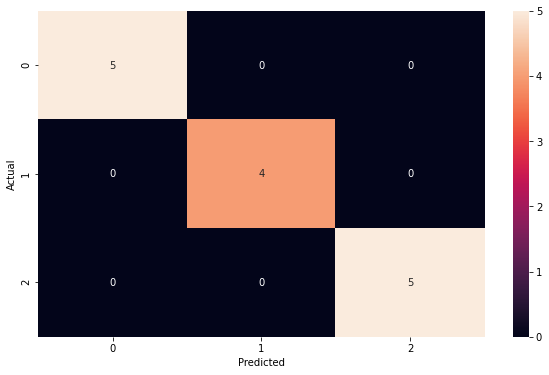

              precision    recall  f1-score   support

     class 2       0.90      1.00      0.95         9
     class 1       1.00      0.75      0.86         4

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         5
     class 0       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         5
     class 1       0.80      1.00      0.89         4
     class 2       1.00      0.75      0.86         4

    accuracy                           0.92        13
   macro avg       0.93      0.92      0.92        13
weighted avg       0

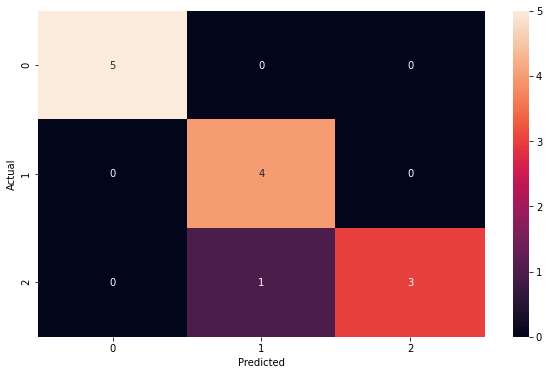

              precision    recall  f1-score   support

     class 2       0.90      1.00      0.95         9
     class 1       1.00      0.75      0.86         4

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         5
     class 0       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         5
     class 1       0.80      1.00      0.89         4
     class 2       1.00      0.75      0.86         4

    accuracy                           0.92        13
   macro avg       0.93      0.92      0.92        13
weighted avg       0

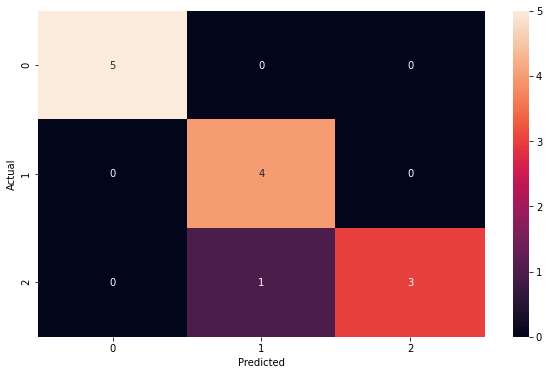

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         9
     class 1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         5
     class 0       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         5
     class 1       1.00      1.00      1.00         4
     class 2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1

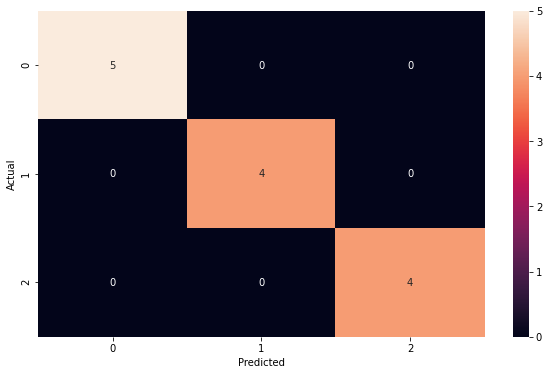

              precision    recall  f1-score   support

     class 2       1.00      1.00      1.00         9
     class 1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00         5
     class 0       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         5
     class 1       1.00      1.00      1.00         4
     class 2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1

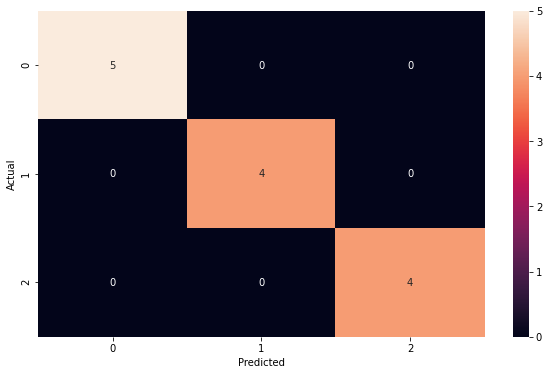

[100.0, 92.85714285714286, 100.0, 100.0, 100.0, 100.0, 92.3076923076923, 92.3076923076923, 100.0, 100.0]
CV Score: 97.75% (+/- 3.44%)


In [11]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cvscores =[]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25']]
y=finalDf['Hired3C']
for train_index, test_index in skf.split(X, y):


    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    scores = CreateModel( X_train, X_test, y_train, y_test)
    
    
    cvscores.append(scores*100)
print(cvscores ) 
print("CV Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
def Find_Metrics(metricsHead,model_pred,model):
    print(metricsHead)
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
   
    mse_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print("MSE: %.3f (%.3f)" % (mse_results.mean(), mse_results.std()))
    
    mse_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print("MSE: %.3f (%.3f)" % (mse_results.mean(), mse_results.std()))
   
    abs_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    print("MAE: %.3f (%.3f)" % (abs_results.mean(), abs_results.std()))
    
    r2_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print("R^2: %.3f (%.3f)" % (r2_results.mean(), r2_results.std()))
    
    print("Test Results")
    print('MSE',metrics.mean_squared_error(y_test,model_pred))
    print('RMSE', mean_squared_error(y_test,model_pred,squared=False))
    print('MAE',metrics.mean_absolute_error(y_test,model_pred))


In [13]:
from sklearn.svm import SVR

finalDf = pd.concat([principalDf, prosody_data[['RecommendHiring']]], axis = 1)
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25']]
y=finalDf['RecommendHiring']
svm_model = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)  

Find_Metrics("SVM METRICS",svm_pred,svm_model)



SVM METRICS
MSE: -0.069 (0.042)
MSE: -0.069 (0.042)
MAE: -0.201 (0.056)
R^2: 0.865 (0.052)
Test Results
MSE 0.09519873950074578
RMSE 0.30854292975329345
MAE 0.21257508092388533


In [14]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

Find_Metrics("LR METRICS",lr_pred,lr_model) 


LR METRICS
MSE: -0.036 (0.014)
MSE: -0.036 (0.014)
MAE: -0.149 (0.037)
R^2: 0.924 (0.030)
Test Results
MSE 0.04946887262528344
RMSE 0.22241599003957302
MAE 0.18713833953988848


In [15]:
from sklearn.ensemble import BaggingRegressor
br_model = BaggingRegressor()
br_model.fit(X_train, y_train)
br_pred = br_model.predict(X_test)

Find_Metrics("BR METRICS",br_pred,br_model)  

BR METRICS
MSE: -0.123 (0.069)
MSE: -0.121 (0.071)
MAE: -0.256 (0.053)
R^2: 0.773 (0.080)
Test Results
MSE 0.19149987534782467
RMSE 0.4376069873160444
MAE 0.3295891423178571


In [16]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train) 
rf_pred = rf_regressor.predict(X_test)  

Find_Metrics("RF METRICS",rf_pred,rf_regressor)  

RF METRICS
MSE: -0.110 (0.051)
MSE: -0.110 (0.051)
MAE: -0.261 (0.044)
R^2: 0.766 (0.088)
Test Results
MSE 0.18502912529200438
RMSE 0.4301501194838895
MAE 0.34055120699999925
